# Failure Mode Analysis — v3 (Neutral Notes Ignored)

This notebook summarizes failure modes with neutral notes (e.g., 'No errors', 'No issues') ignored.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

CSV_PATH = Path(r"results_20251011_123314_failure_modes.csv")
df = pd.read_csv(CSV_PATH)
df.head()


,id,query,response,open_code_notes,Failure_Mode_Adherence_Ingredients,Failure_Mode_Dietary_Compliance,Failure_Mode_Time_Effort_Mismatch,Failure_Mode_Recipe_Quality_Clarity,Failure_Mode_Cuisine_Preference,Other_Failure_Mode_Specify
0,9683c0ce-18bd-4948-83ff-660ab949f217,what's a good snack from japanese cuisine?,## Edamame with Sea Salt\n\nA simple and nutri...,No errors,0,0,0,0,0,0
1,52037f13-1fca-4f56-9366-c9ab2c5fb606,looking for keto snack ideas japanese food,## Spicy Tuna Avocado Salad\n\nThis refreshing...,I'm not sure what 'Gently fold in the diced av...,0,0,0,1,0,0
2,4a957093-f48e-4123-90b2-ef85cb4fe462,looking for a gluten-free japanese breakfast r...,## Savory Japanese Breakfast Bowl (Tamago Goha...,I need the recipe for a bigginer. Be more spei...,0,0,0,0,0,1
3,ec09460e-7139-4dc6-b8ba-72b8a66c1ad7,need a quick korean vegan lunch idea,## Spicy Korean Tofu Wrap\n\nA flavorful and n...,No errors,0,0,0,0,0,0
4,aed47521-e686-4051-b171-c5cf1ac36ec0,need a quick keto lunch recipe japanese style,## Keto Japanese Chicken Salad\n\nThis refresh...,No errors,0,0,0,0,0,0


In [2]:
failure_modes = [
    "Failure_Mode_Adherence_Ingredients",
    "Failure_Mode_Dietary_Compliance",
    "Failure_Mode_Time_Effort_Mismatch",
    "Failure_Mode_Recipe_Quality_Clarity",
    "Failure_Mode_Cuisine_Preference",
    "Other_Failure_Mode_Specify",
]


In [3]:
freq = df[failure_modes].sum().sort_values(ascending=False).rename("count").to_frame()
freq["percent"] = (freq["count"] / len(df) * 100).round(2)
freq


,count,percent
Other_Failure_Mode_Specify,10,10.0
Failure_Mode_Time_Effort_Mismatch,3,3.0
Failure_Mode_Recipe_Quality_Clarity,2,2.0
Failure_Mode_Adherence_Ingredients,1,1.0
Failure_Mode_Dietary_Compliance,0,0.0
Failure_Mode_Cuisine_Preference,0,0.0


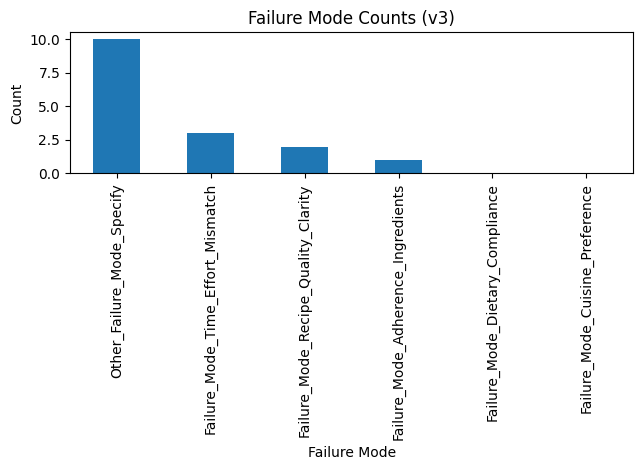

In [4]:
plt.figure()
freq["count"].plot(kind="bar")
plt.title("Failure Mode Counts (v3)")
plt.xlabel("Failure Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [5]:
binary = df[failure_modes].astype(int)
cooc = binary.T.dot(binary)
cooc


,Failure_Mode_Adherence_Ingredients,Failure_Mode_Dietary_Compliance,Failure_Mode_Time_Effort_Mismatch,Failure_Mode_Recipe_Quality_Clarity,Failure_Mode_Cuisine_Preference,Other_Failure_Mode_Specify
Failure_Mode_Adherence_Ingredients,1,0,1,0,0,0
Failure_Mode_Dietary_Compliance,0,0,0,0,0,0
Failure_Mode_Time_Effort_Mismatch,1,0,3,0,0,0
Failure_Mode_Recipe_Quality_Clarity,0,0,0,2,0,0
Failure_Mode_Cuisine_Preference,0,0,0,0,0,0
Other_Failure_Mode_Specify,0,0,0,0,0,10


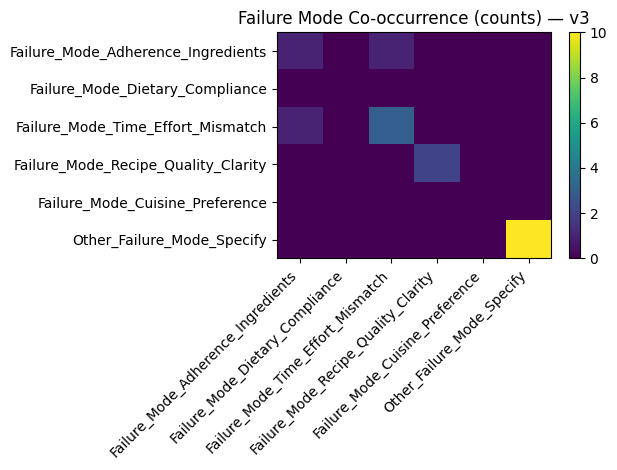

In [6]:
plt.figure()
plt.imshow(cooc.values, aspect="auto")
plt.title("Failure Mode Co-occurrence (counts) — v3")
plt.xticks(range(len(failure_modes)), failure_modes, rotation=45, ha="right")
plt.yticks(range(len(failure_modes)), failure_modes)
plt.colorbar()
plt.tight_layout()
plt.show()


## Inspect 'Other' Failure Mode Notes

In [7]:
other = df[df["Other_Failure_Mode_Specify"] == 1][["id", "query", "open_code_notes"]].copy()
print(f"Found {len(other)} entries classified as Other_Failure_Mode_Specify.")
other.head(25)


Found 10 entries classified as Other_Failure_Mode_Specify.


,id,query,open_code_notes
2,4a957093-f48e-4123-90b2-ef85cb4fe462,looking for a gluten-free japanese breakfast r...,I need the recipe for a bigginer. Be more spei...
22,d1837853-eacb-46e5-8fcf-2716bc3fbad9,what's a good keto korean dinner?,"""No errors"""
23,08d9e401-0014-4669-8f93-906c00dee0c0,looking for a vegan japanese dinner recipe,"""No errors"""
24,69c3bdd2-c9b9-45a1-b56b-5bd5cc808fbe,what's a good keto dinner from japanese cuisine?,"""No errors"""
28,0997f2a3-5836-4d2e-b6ed-be7c4d48ec95,what's a good vegan lunch in japanese cuisine?,This recipe will take more than 15 minutes.
33,95bdd122-b602-4254-8a46-fa4d71776e05,vegan chinese breakfast ideas?,This recipe will take more than 15 minutes. We...
55,5c30c26a-e59a-4f73-b609-95114666ff2e,any gluten-free thai breakfast recipes?,This recipe takes more than 15 minutes.
58,1ccb24c6-a1e5-43b6-a6af-5f5e2939117d,gluten-free chinese breakfast recipes?,This recipe takes more than 15 minutes.
63,2b79ff2e-e4cd-4754-8065-7cf0c72a9fca,any thai snack recipes?,This recipe takes more than 15 minutes.
74,a162af7e-540f-4246-9a86-97bcbee724b3,looking for gluten-free mexican dinner recipes,This recipe takes more than 15 minutes.


In [ ]:
from pathlib import Path
OUT_FREQ_CSV = Path("failure_mode_frequency.csv")
OUT_COOC_CSV = Path("failure_mode_cooccurrence.csv")
OUT_OTHER_CSV = Path("failure_mode_other_notes.csv")

freq.to_csv(OUT_FREQ_CSV)
cooc.to_csv(OUT_COOC_CSV)
other.to_csv(OUT_OTHER_CSV, index=False)

print("Wrote:", OUT_FREQ_CSV)
print("Wrote:", OUT_COOC_CSV)
print("Wrote:", OUT_OTHER_CSV)
